In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import time

Loading the test set: dataframe, predicted and actual $d_{hkl}$ distances

In [2]:
df = pd.read_csv('dftest.csv')
pred = np.load('2R4P2R_2R3P2R_54_predtest.npy')
y = np.load('ytest.npy')

Plotting the learning curves

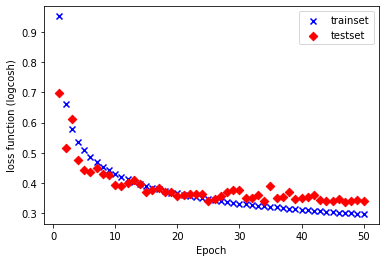

In [59]:
cf = pd.read_csv('2R4P2R_2R3P2R_54.csv', header=None)
plt.figure()
plt.scatter(np.arange(1,cf.shape[0]+1), cf[0], marker='x', color='blue', label = 'trainset')
plt.scatter(np.arange(1,cf.shape[0]+1), cf[1], marker='D', color='red', label = 'testset')
plt.ylabel('loss function (logcosh)')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()

Computing the root-mean-squared error (RMSE) for each $d_{hkl}$ distance ($d_{100}$, $d_{010}$, $d_{001}$, $d_{110}$, $d_{101}$, and $d_{100}$):

In [4]:
((y - pred)**2).mean(axis=0)**0.5

array([1.87522404, 1.20237654, 0.98519079, 0.92959244, 0.75123732,
       0.80227788])

Calculating the global RMSE:

In [5]:
rmse = ((y - pred)**2).mean()**0.5

In [6]:
rmse

1.1550559027108331

Checking the proportion of the assessments with an error within one RMSE:

In [7]:
(((y-pred)**2).mean(axis=1)**0.5 <= rmse).sum()/y.shape[0]

0.8178537054860443

Plots for interplanar distance $d_{100}$
RMSE 1.8752 angstrom
MAPE: 6.0373 %


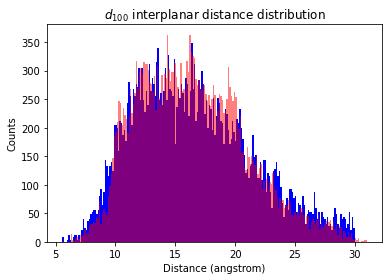

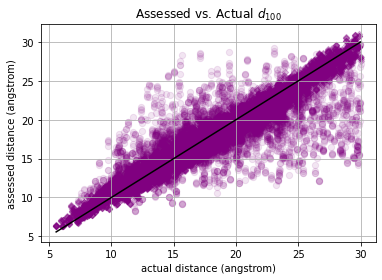

Plots for interplanar distance $d_{010}$
RMSE 1.2024 angstrom
MAPE: 6.4096 %


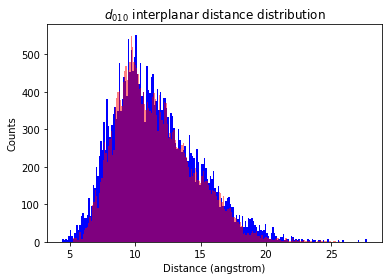

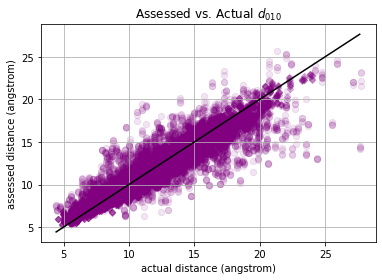

Plots for interplanar distance $d_{001}$
RMSE 0.9852 angstrom
MAPE: 7.4724 %


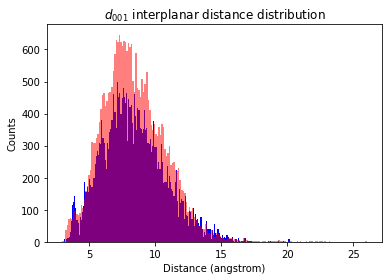

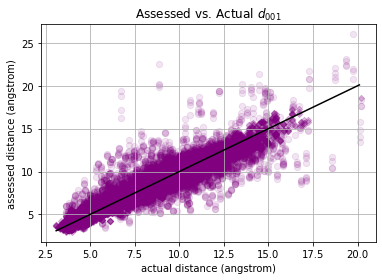

Plots for interplanar distance $d_{110}$
RMSE 0.9296 angstrom
MAPE: 7.4811 %


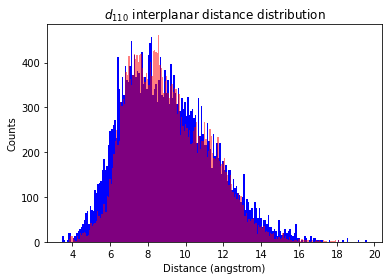

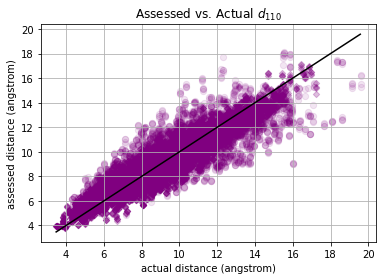

Plots for interplanar distance $d_{101}$
RMSE 0.7512 angstrom
MAPE: 7.453 %


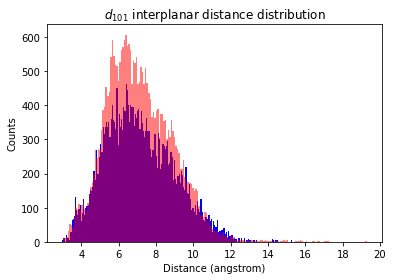

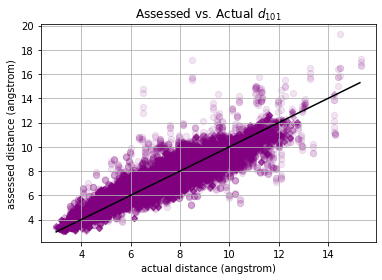

Plots for interplanar distance $d_{011}$
RMSE 0.8023 angstrom
MAPE: 9.004 %


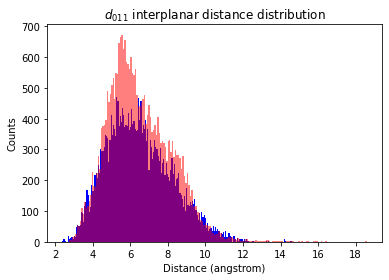

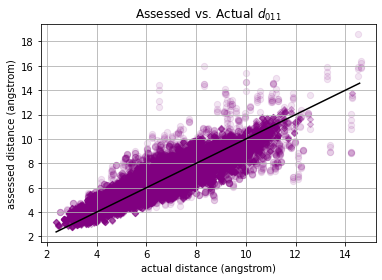

In [72]:
rmses = dict()

condl = ((y-pred)**2).mean(axis=1)**0.5 <= 1*rmse
condl = np.argwhere(condl)[:,0]

condg = ((y-pred)**2).mean(axis=1)**0.5 > 1*rmse
condg = np.argwhere(condg)[:,0]

dhkl = {0:r'$d_{100}$', 1:r'$d_{010}$', 2:r'$d_{001}$', 
        3:r'$d_{110}$', 4:r'$d_{101}$', 5:r'$d_{011}$'}

for j in range(y.shape[-1]):
    
    rmses[j] = ((y[:,j]-pred[:,j])**2).mean()**0.5
    mape = 100*abs(y[:,j]-pred[:,j])/(y[:,j])
    
    print('Plots for interplanar distance', dhkl[j])
    print('RMSE', rmses[j].round(4), 'angstrom')
    print('MAPE:',mape.mean().round(4), '%')

    df['y' + str(j)] = y[:,j]
    df['p' + str(j)] = pred[:,j]
    df['diff' + str(j)] = abs(y[:,j]-pred[:,j])

    plt.figure()
    plt.title(dhkl.get(j, None) + ' interplanar distance distribution')
    plt.hist(y[:,j], bins=200, color='blue')
    plt.hist(pred[:,j], bins = 200, color = 'red', alpha = 0.5 )
    plt.ylabel('Counts')
    plt.xlabel('Distance (angstrom)')
    plt.show()
    
    plt.figure()
    plt.title('Assessed vs. Actual ' + dhkl.get(j, None))
    plt.scatter(y[condl,j],pred[condl,j], marker='D', color='purple', s=20, alpha=0.25)
    plt.scatter(y[condg,j],pred[condg,j], marker='o', color='purple', s=40, alpha=0.10)
    plt.ylabel('assessed distance (angstrom)')
    plt.xlabel('actual distance (angstrom)')
    plt.grid(True)
    plt.plot(np.arange(y[:,j].min(), y[:,j].max(),0.1), np.arange(y[:,j].min(), y[:,j].max(),0.1), color='black')
    plt.show()
    

Plot of the error distribution

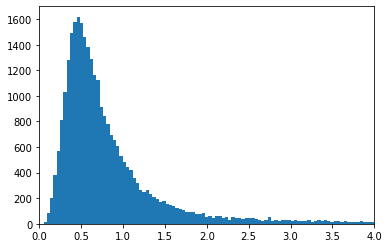

In [10]:
plt.figure()
plt.hist(((y-pred)**2).mean(axis=1)**0.5, 200)
plt.xlim(0,4)
plt.show()

Calculating the mean RMSE for each assessment. Appending the results in the dataframe

In [11]:
df['rmse'] = ((y-pred)**2).mean(axis=1)**0.5

unsam = df.shape[0]//4
df.iloc[:unsam,:].sort_values(by='rmse').to_csv('comparison_macro_predictions.csv', index=None)

In [12]:
df

,name,sgnum,y0,p0,diff0,y1,p1,diff1,y2,p2,...,y3,p3,diff3,y4,p4,diff4,y5,p5,diff5,rmse
0,4028939_macro,15,19.797293,19.345621,0.451672,18.422001,17.470318,0.951683,8.786885,9.516534,...,13.486335,12.551940,0.934395,7.911808,8.345757,0.433949,7.930906,8.227169,0.296263,0.682065
1,4071070_macro,14,14.902562,14.127913,0.774649,12.440341,12.402578,0.037763,11.723100,11.895115,...,8.692663,9.108113,0.415450,9.213898,8.861474,0.352424,8.531782,8.330439,0.201343,0.401754
2,2004144_macro,14,14.842461,14.173080,0.669381,10.283583,11.423261,1.139678,8.524000,8.377041,...,7.430506,8.173050,0.742544,7.391750,7.060855,0.330894,6.562624,6.592716,0.030093,0.636436
3,2208398_macro,14,20.790001,19.488359,1.301641,16.917364,16.617748,0.299615,10.797079,11.071587,...,13.121925,12.485018,0.636908,9.581937,9.411957,0.169980,7.629926,9.024359,1.394433,0.840474
4,1506661_macro,19,15.791700,15.319721,0.471979,12.141400,12.085272,0.056129,10.894900,9.288535,...,9.625350,9.364806,0.260544,8.967740,7.481574,1.486166,8.108853,6.932032,1.176821,1.038252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29087,1505311_0250,4,14.627763,14.322175,0.305588,9.140100,9.430195,0.290095,9.035157,8.590297,...,7.751325,7.663308,0.088017,7.057620,7.227399,0.169779,6.425602,6.214101,0.211501,0.275906
29088,2221376_0250,2,16.686938,15.665393,1.021545,11.943311,11.143901,0.799410,4.433128,4.700409,...,9.963938,9.188697,0.775241,4.327955,4.627562,0.299607,4.237543,4.415402,0.177859,0.642449
29089,2241794_0250,33,11.700100,10.673563,1.026537,8.069000,9.120625,1.051625,6.997000,6.833275,...,6.642513,6.883188,0.240675,6.005093,5.579504,0.425589,5.286303,5.376213,0.089910,0.636872
29090,2202628_0250,2,10.602718,10.235037,0.367681,9.995760,9.969199,0.026560,9.673575,9.070038,...,6.269823,6.586095,0.316272,5.998239,6.205287,0.207047,6.624328,6.110963,0.513365,0.388714
